### **Содержание**

* [1. Изучение данных из файла](#chapter1)
    * [1.1 Названия переменных](#section1_1)
    * [1.2 Дубликаты и пропуски](#section1_2)
        * [1.2.1 Заполняем пропуски](#section1_2_1)
* [2. Предобработка данных](#chapter2)
* [3. Расчеты и добавление результатов в таблицу](#chapter3)
* [4. Исследовательский анализ данных](#chapter4)
    * [Section 4.1](#section_4_1)
    * [Section 4.2](#section_4_2)
    * [Section 4.3](#section_4_1)
    * [Section 4.4](#section_4_2)
* [5. Общий вывод](#chapter5)
* [Чеклист](#chapter_checklist)

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Задача:** Установить параметры, которые определяют рыночную стоимость объектов недвижимости. 

Загружаем библиотеки и необходимые модули к ним:

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Пока не ясна структура данных, но заранее можно настроить полезную опцию в библиотеке *pandas* - установить количество отображаемых знаков после запятой для непрерывных переменных (*float*).
Также уменьшим базовое количество отображаемых строк в *pandas* до 10.

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 55)

### 1. Изучение и загрузка данных из файла <a class="anchor" id="chapter1"></a>

In [7]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Воспользуемся функциец *display* она отображает структуру данных наиболее наглядно.

In [8]:
display(df.sample(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22361,11,"4,850,000.00",44.00,2017-02-02T00:00:00,1,2.75,25.00,19.30,24,False,...,11.40,2.00,Санкт-Петербург,"35,194.00","15,950.00",0.00,NaN,2.00,847.00,137.00
2763,18,"6,800,000.00",38.00,2017-11-17T00:00:00,1,NaN,17.00,18.00,10,NaN,...,11.00,NaN,Санкт-Петербург,"39,474.00","12,650.00",1.00,96.00,0.00,NaN,215.00
15028,11,"2,950,000.00",30.20,2017-09-27T00:00:00,1,NaN,9.00,17.80,2,NaN,...,6.20,0.00,Санкт-Петербург,"45,042.00","18,613.00",0.00,NaN,1.00,464.00,35.00
17389,12,"4,750,000.00",70.10,2018-09-28T00:00:00,3,NaN,10.00,43.00,2,NaN,...,8.80,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,158.00
19859,6,"3,600,000.00",30.30,2018-03-23T00:00:00,1,2.50,9.00,17.50,6,NaN,...,6.10,1.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,9.00
4557,9,"6,000,000.00",67.40,2017-06-05T00:00:00,3,NaN,17.00,40.20,15,False,...,7.70,2.00,Санкт-Петербург,"39,418.00","14,702.00",0.00,NaN,0.00,NaN,57.00
5900,7,"5,500,000.00",46.20,2019-04-11T00:00:00,2,2.60,12.00,29.60,4,NaN,...,8.40,1.00,Санкт-Петербург,"42,363.00","10,680.00",3.00,316.00,1.00,372.00,NaN
20248,14,"850,000.00",63.00,2017-12-19T00:00:00,3,2.50,5.00,42.00,1,NaN,...,6.00,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,175.00
9776,20,"3,100,000.00",37.00,2019-01-10T00:00:00,1,2.55,9.00,14.00,2,NaN,...,7.00,2.00,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00
22541,6,"3,850,000.00",40.00,2016-01-30T00:00:00,1,2.70,12.00,20.10,9,NaN,...,8.50,0.00,Санкт-Петербург,"33,632.00","14,731.00",0.00,NaN,1.00,207.00,172.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
print('Всего строк в датафрейме:',len(df))
print('Всего столбцов в датафреме:',len(df.columns))
print(df.shape)

Всего строк в датафрейме: 23699
Всего столбцов в датафреме: 22
(23699, 22)


В нашем фрейме данных 22 столбца в которых:
- 17 переменных колличественного формата
    * 3 переменных целочисленного формата
    * 14 переменных непрерывных
- 2 булевы переменные
- 3 категориальные переменные

В нашем датафрейме 23699 строчек с данными, хотя не существует строгого процента данных, который можно безопасно "отсеять". Однако, общим правилом является то, что если вы теряете более **5-10%** данных из-за пропущенных значений, это может повриять на надежность выводов. \
Также это зависит и от природы распределения данных: если пропущенные значения случайны и равномерно распределены по всему набору данных, потеря небольшого процента может быть менее критичной, если пропущенные данные смещены систематически.

In [11]:
# Запомним исходный размер данных, чтобы в последующем оценить приемлимость % отсеянных данных.
origin_size = df.shape[0]
print('Исходное кол-во строк в датафрейме:',origin_size)

Исходное кол-во строк в датафрейме: 23699


Нарисуем гистограмму распределения велечин для всех числовых переменных в данных:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

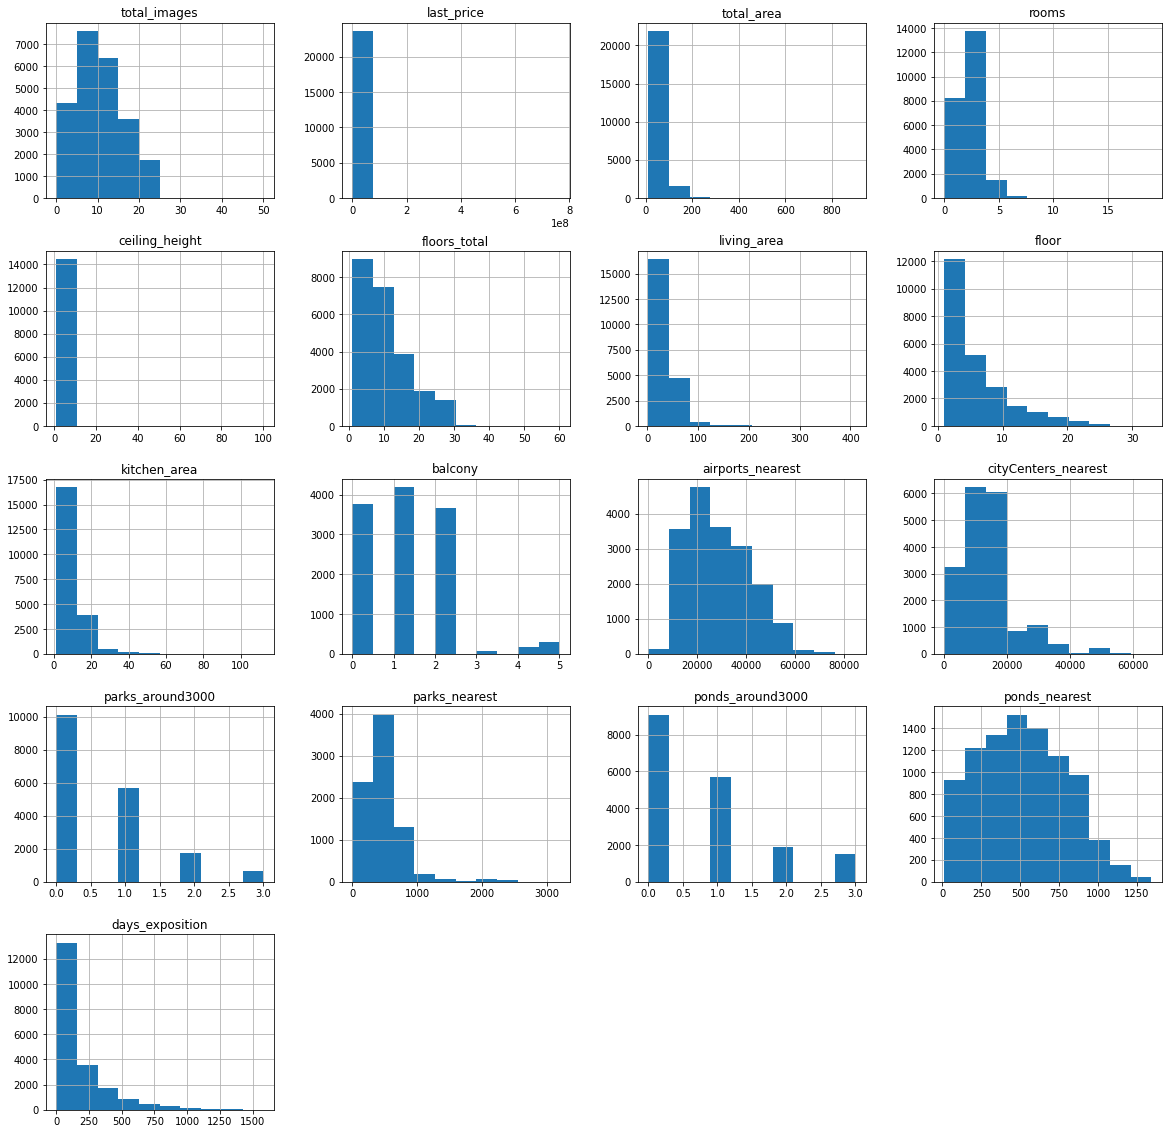

In [12]:
df.hist(figsize=(20,20))

Можно отметить, что распределение для непрерывных величин отображается довольно проблематично (особенно для велечин *last_price* и *celling_height*), но набор гистограм дает наглядное понимание того, как распределяются значения в числовых переменных.

Посмотрим наборы значений для категореальных переменных:

In [13]:
print('Уникальных значений в столбце с названием локации:', len(df['locality_name'].unique()))
# стоит отмеить, что в названии локаций могут быть неявные дубликаты, которые мы устраним позже.

Уникальных значений в столбце с названием локации: 365


#### 1.1 Приведем название переменных в приемлемый вид: <a class="anchor" id="section1_1"></a>

* cityCenters_nearest -> city_centers_nearest - изменим название в рамках "змеиного" языка.

* floor -> floor_number - чтобы не перепутать переменную о этаже квартиры с переменной обозначающей этажность здания изменим переменную **floor** 

* total_images -> images_count - по-моему мнению, когда речь идет об учтенном количестве чего либо, когда это возможно, лучше уточнять переменную особым образом, в данных случая добавим к названиям столбцов поментку **count**
* balcony -> balcony_count 
* floors_total -> floors_count 
* rooms -> rooms_count 


In [14]:
df = df.rename({'cityCenters_nearest': 'city_centers_nearest',
                'total_images' : 'images_count',
                'balcony': 'balcony_count',
                'floors_total': 'floors_count',
                'rooms': 'rooms_count', 
                'floor': 'floor_number'}
                , axis='columns')
df.columns

Index(['images_count', 'last_price', 'total_area', 'first_day_exposition',
       'rooms_count', 'ceiling_height', 'floors_count', 'living_area',
       'floor_number', 'is_apartment', 'studio', 'open_plan', 'kitchen_area',
       'balcony_count', 'locality_name', 'airports_nearest',
       'city_centers_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

#### 1.2 Явные дубликаты и пропуски в данных <a class="anchor" id="section1_2"></a>

In [15]:
print('Явные дубликаты строчек в данных:', df.duplicated().sum())

Явные дубликаты строчек в данных: 0


Обратимся к данным еще раз и посмотрим, какие столбцы содержат в себе пропуски.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   images_count          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms_count           23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_count          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor_number          23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony_count         12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Теперь попытаемся наглядно представить информацию о том, сколько пропусков содержит каждый столбец.

In [17]:
df_na = pd.DataFrame()
df_na['na_percent'] = df.isnull().sum()/len(df) * 100
df_na['na_count'] =  df.isnull().sum()
df_na['df_lenght']  = len(df)
df_na = df_na[df_na['na_count'] > 0] # убедимся что вывод будет содержать только строки столбцы с пропусками.
display(df_na.sort_values(by='na_percent',ascending=False).head(20))

,na_percent,na_count,df_lenght
is_apartment,88.29,20924,23699
parks_nearest,65.91,15620,23699
ponds_nearest,61.56,14589,23699
balcony_count,48.61,11519,23699
ceiling_height,38.80,9195,23699
airports_nearest,23.38,5542,23699
city_centers_nearest,23.29,5519,23699
parks_around3000,23.28,5518,23699
ponds_around3000,23.28,5518,23699
days_exposition,13.42,3181,23699


Из представленной выше таблицы видно, что пропуски есть в 14 столбцах, у нас есть минимум 3 подхода в данном случае:
* Где возможно **заполнить пропуски**:
   - Запонить пропуск средним или медианой характерной для пропусков в группе похожих строчек;
   - Если столбец содержит значения *True* | *False*, скорее всего отсутсвее значения может указывать на то, что параметр был не указан польователем в следстве его отсутсвия, поэтому пропуск чаще всего можно заполнить как *False*;
* **Удалить строчки с пропусками** в определенных столбцах;
* **Оставить как есть**, так как удаление пропусков приведет к существенной потере данных, а заполнить пропуски не представляется возможным из-за недостатка данных о том, какая информация должна быть представлена в пропуске.

### 2. Предобработка данных <a class="anchor" id="chapter2"></a>

##### 2.1 Заполняем пропуски <a class="anchor" id="section2_1"></a>
##### Начнем со столбца с наибольшей долей пропусков *is_apartment*.

In [18]:
print(df['is_apartment'].unique())

[nan False True]


Исходя из написанного кода выше можно сделать вывод, что переменная *is_apartment* содержит в себе 3 значения: 
* **True**;
* **False**;
* **Nan**; \
Этот слобец принадлежит к данным, которые пользователи заполняли вручную, поэтому можно предположить, что пропущенные значения в этом столбце возникли из-за того, что эту характеристику было не обязательно указывать. То есть, люди сдающие апартаменты, более сконны отмечать этот параметр за недвижимостью, и наоборот, человек сдающий обычную квартиру скорее всего просто пропустит этот параметр. \
Таким образом, заменим пропущенные значения на **False**.

In [19]:
df['is_apartment'] = df['is_apartment'].fillna(False)
print('Пропущенных значений в столбце is_apartment:',df['is_apartment'].isna().sum())
print(df['is_apartment'].value_counts())

Пропущенных значений в столбце is_apartment: 0
False    23649
True        50
Name: is_apartment, dtype: int64


Хоть мы и удалили все пропуски, переменная не станет типом *bool*, позднее мы это исправим

##### Кол-во балконов
Поступим таким же образом со столбцом *balcony*, где пропуски в значении кол-ва балконов скорее всего означют отсутствие балкона в квартире.

In [20]:
df['balcony_count'] = df['balcony_count'].fillna(0)
print('Пропущенных значений в столбце is_apartment:',df['balcony_count'].isna().sum())
print(df['balcony_count'].value_counts())

Пропущенных значений в столбце is_apartment: 0
0.00    15277
1.00     4195
2.00     3659
5.00      304
4.00      183
3.00       81
Name: balcony_count, dtype: int64


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

Столбец с кол-вом балконов так же имеет некорректный тип, это мы также исправим позже

##### Размер кухни

В некоторых местах не указан размер кухни. Возможно, в определенных случаях люди пропускают эти поля, если квартира является апартаментами или же имеет свободную планировку. В таком случае нет распределения на зоны в классическом плане.
Посмотрим сколько таких квартир.

In [21]:
df_kitchen = df[(df['kitchen_area'] != df['kitchen_area']) & ((df['open_plan'] == True) | (df['studio'] == True))]
df_kitchen_na = df[(df['kitchen_area'] != df['kitchen_area'])]

print('Всего пропусков в столбце с параметром кухонной зоны:',((df[(df['kitchen_area'] != df['kitchen_area'])]).shape)[0])
print('Пропусков в кухонных зонах в квартирах открытого типо и апартаментах:',((df[(df['kitchen_area'] != df['kitchen_area']) & ((df['open_plan'] == True) | (df['studio'] == True))]).shape)[0])

Всего пропусков в столбце с параметром кухонной зоны: 2278
Пропусков в кухонных зонах в квартирах открытого типо и апартаментах: 216


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Интересный подход

##### Переменные *airports_nearest*, *city_centers_nearest*, *parks_around3000*, *parks_nearest*

В переменных: *airports_nearest*, *city_centers_nearest*, *parks_around3000*, *parks_nearest*,
\
 *ponds_around3000*, *ponds_nearest* - нет возможсти заполнить пропуски.\
Так как эти переменные не зависят от других данных и нет оснований для того, чтобы заполнять пропуски в них каким-либо образом.\
Чтобы избежать пропусков в будущем, можно их заполнять автоматически на основе общих данных о географическом положении дома.\
Столбец *days_exposition* тоже невозможно заполнить, пропуски в этом столбике могли появиться, если квартира не сдалась на момент формирования данных или же объявление не было удалено по каким-либо причинам.


##### Пропуски в *locality_name*

Пропуски в *locality_name* довольно интересны, хоть их достаточно мало (около 2%) и, в принципе, от них можно спокойно избавиться, у меня есть идея как в некоторых случаях их можно заполнить. \
Так, у нас нет точных географических данных о положении объекта недвижимости (например, координат), однако данные в колонках *arports_nearest* и *city_centres_nearest* отражают расстояние до ближайшего аэропорта и городского центра соответсвенно. 


Исходя из этого, можно предположить: Если колонке *locality_name* пропуск, но в ячейках *airpot_nearest* и *city_centers_nearest* есть значения, а также существуют строчки со схожими значениями в *airpot_nearest* и *city_centers_nearest*, но где *locality_name* не пропущен, то прорущенное значение *locality_name* можно заменить на основе схожих строчек, где оно не пропущено. \
Приведу пример:

In [22]:
# Для начала удалим строки, где отсутсвют все 3 значения по индексам.
df = df.drop(index=list((
    df[(df['locality_name'] != df['locality_name']) & 
    (df['city_centers_nearest'] != df['city_centers_nearest']) & 
    (df['airports_nearest'] != df['airports_nearest'])])
    .index.values))

In [23]:
df_locality = df[(df['locality_name'] != df['locality_name'])]
df_locality = df_locality[['city_centers_nearest', 'airports_nearest', 'locality_name', 'floors_count']]
print(df_locality.sort_values(by='city_centers_nearest', ascending=False).head(20))

       city_centers_nearest  airports_nearest locality_name  floors_count
21276             41,294.00         60,195.00           NaN          3.00
21119             31,897.00         19,744.00           NaN          4.00
8986              31,813.00         19,659.00           NaN           NaN
13690             23,659.00         20,234.00           NaN          2.00
6765              17,369.00         22,041.00           NaN         24.00
14273             17,369.00         22,041.00           NaN         23.00
16499             17,369.00         22,041.00           NaN         24.00
2603              17,369.00         22,041.00           NaN         24.00
13223             17,369.00         22,041.00           NaN         24.00
19972             17,369.00         22,041.00           NaN         24.00
22933             17,369.00         22,041.00           NaN         23.00
2632              17,369.00         22,041.00           NaN         24.00
5707              16,788.00         21

Саруз становится видно, что данные имеют закономерности в соблюдении.\
Например, повторяются значение 17'369 и 22'041, очевидно, что все эти данные принадлежат к одному дому. Указанная этажность дома это подтверждает.

In [24]:
df_locality = df[(df['city_centers_nearest'] == 17369) & 
                (df['airports_nearest'] == 22041)]
print(df_locality[['city_centers_nearest', 'airports_nearest', 'locality_name', 'floors_count']])

       city_centers_nearest  airports_nearest    locality_name  floors_count
237               17,369.00         22,041.00  Санкт-Петербург           NaN
671               17,369.00         22,041.00  Санкт-Петербург           NaN
2603              17,369.00         22,041.00              NaN         24.00
2632              17,369.00         22,041.00              NaN         24.00
2846              17,369.00         22,041.00  Санкт-Петербург           NaN
4617              17,369.00         22,041.00  Санкт-Петербург           NaN
5784              17,369.00         22,041.00  Санкт-Петербург           NaN
6765              17,369.00         22,041.00              NaN         24.00
10013             17,369.00         22,041.00  Санкт-Петербург           NaN
10027             17,369.00         22,041.00  Санкт-Петербург           NaN
13223             17,369.00         22,041.00              NaN         24.00
13438             17,369.00         22,041.00  Санкт-Петербург           NaN

Видно что многие параметры сходятся, очевидно, что речь в данных идет об одном доме.
Помимо названия локации заменим недостающие данные в других колонках, где это возможно.

In [25]:
df_index_fill = list((df[(df['city_centers_nearest'] == 17369) & 
                (df['airports_nearest'] == 22041)]).index.values)
df.loc[df_index_fill, 'locality_name'] = 'Санкт-Петербург'
df.loc[df_index_fill, 'floors_count'] = 24
df.loc[df_index_fill, 'ceiling_height'] = 2.75

В целом, я нашел еще один локацию или район со схожими домами в рамках одной локации.

In [26]:

df_index_fill = list((df[((df['city_centers_nearest'] > 4200) & 
                (df['city_centers_nearest'] < 4900)) & 
                ((df['airports_nearest'] > 23000) & 
                (df['airports_nearest'] < 26000))]).index.values)
df.loc[df_index_fill, 'locality_name'] = 'Санкт-Петербург'

Остальные типовые дома выявить не представляется возможным, либо делать это неоправданно долго, для сохранения очень малого числа данных. Все возможные данные по пропускам в этом столбце мы уже "спасли"

Удалим небольшое кол-во строк, где пропущено название локации и кол-во этажей.

In [27]:
df = df.dropna(subset=['floors_count', 'locality_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23592 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   images_count          23592 non-null  int64  
 1   last_price            23592 non-null  float64
 2   total_area            23592 non-null  float64
 3   first_day_exposition  23592 non-null  object 
 4   rooms_count           23592 non-null  int64  
 5   ceiling_height        14503 non-null  float64
 6   floors_count          23592 non-null  float64
 7   living_area           21727 non-null  float64
 8   floor_number          23592 non-null  int64  
 9   is_apartment          23592 non-null  bool   
 10  studio                23592 non-null  bool   
 11  open_plan             23592 non-null  bool   
 12  kitchen_area          21366 non-null  float64
 13  balcony_count         23592 non-null  float64
 14  locality_name         23592 non-null  object 
 15  airports_nearest   

##### Высота потолков

Изучим медианные значения для недвижимости сгруппированной по этажности

In [28]:
print(df.groupby('floors_count')['ceiling_height'].median())
print('Максимальная высота потолков:',(df.groupby('floors_count')['ceiling_height'].median()).max())
print('Минимальная высота потолков:',(df.groupby('floors_count')['ceiling_height'].median()).min())

floors_count
1.00     2.80
2.00     2.70
3.00     2.80
4.00     3.00
5.00     2.55
6.00     3.00
7.00     3.00
8.00     2.80
9.00     2.55
10.00    2.60
11.00    2.75
12.00    2.65
13.00    2.70
14.00    2.60
15.00    2.70
16.00    2.70
17.00    2.70
18.00    2.70
19.00    2.75
20.00    2.75
21.00    2.70
22.00    2.75
23.00    2.75
24.00    2.75
25.00    2.75
26.00    2.66
27.00    2.70
28.00    2.60
29.00    2.60
33.00     NaN
34.00    2.65
35.00    2.70
36.00   14.85
37.00    1.75
52.00    2.65
60.00    2.88
Name: ceiling_height, dtype: float64
Максимальная высота потолков: 14.85
Минимальная высота потолков: 1.75


Видно, что в данных встречаются странные значения, которых быть не должно: достигают максимального медианного значения в 14! метров, а минимального в 1.75.\
После детального рассмотрения данных, было выявлено, что аномалии характерны для домов с 27+ этажностью.

In [29]:
celling_height = pd.pivot_table(df, dropna=False,index='floors_count', values='ceiling_height', 
aggfunc=['median','count'])
#celling_height = celling_height[27:]
print(celling_height)

                     median          count
             ceiling_height ceiling_height
floors_count                              
1.00                   2.80             10
2.00                   2.70            213
3.00                   2.80            399
4.00                   3.00            787
5.00                   2.55           3663
6.00                   3.00            618
7.00                   3.00            397
8.00                   2.80            219
9.00                   2.55           2557
10.00                  2.60            750
11.00                  2.75            109
12.00                  2.65            853
13.00                  2.70            117
14.00                  2.60            343
15.00                  2.70            225
16.00                  2.70            864
17.00                  2.70            503
18.00                  2.70            275
19.00                  2.75            134
20.00                  2.75            156
21.00      

Посмотрим на аномальные данные 33, 36 и 37 этажа

In [30]:
df[['floors_count','floor_number', 'ceiling_height']].query('floors_count == 33 or floors_count == 36 or floors_count == 37')

,floors_count,floor_number,ceiling_height
397,36.00,28,NaN
5807,36.00,13,27.00
11079,36.00,29,2.70
11575,33.00,32,NaN
16934,37.00,5,1.75


* Дом с 33мя этажами только один, пропуск можно заменить на медианное значение для домов похожей этажности;
* В водме с 36ю этажами потолки 27 метров, очевидно, что тут пропущена запятая, так как мы видим, что медиана по каждому этажу находится в районе 2.7 метров. Вохможно, это не единственная страка с ошибкой, проверим этот довод далее.
* В доме с 37ю этажами потолки 1.75 метра, должно быть ошибка появилась в результате неправильного ввода данных.

Чтобы заполнить пропущенные значения в колонке с высотой потолков, нужно привести в порядок медианы для тех этажей, где наблюдений мало, иначе мы заменим пропуски на некорректные значения.
Для начала заполним пропуски в ячейках, где пропущено значание высоты потолка на медианное по всему столбцу.

In [31]:
df.loc[df['floors_count'] == 36, 'ceiling_height'] = 2.7

Если потолок больше 20 метров, очевидно, что это ошибка в наборе числа, разделим все значения выше 20 метров на 10. \
Мы делим значения выше 20 метров, потому что медиана высоты потолков обитает в районе ~2.7.
Таким образом, мы берем в расчет, что эти числа могли появиться если человек допустил ошибку в наборе значения, начиная писать с цифры "2".\
Другие же высоты потолков больше 10м кажутся неправдоподобными, а заменять на медиану их нет смысла, тк это может исказить анализ. \
Избавимся от них позже.

In [32]:
df.loc[df['ceiling_height'] > 20, 'ceiling_height'] = df.loc[df['ceiling_height'] > 20, 'ceiling_height']/10

celling_height = pd.pivot_table(df, 
dropna=False,
index='floors_count', 
values='ceiling_height', 
aggfunc=['median','count'])
display(celling_height)

,median,count
,ceiling_height,ceiling_height
floors_count,,
1.00,2.80,10
2.00,2.70,213
3.00,2.80,399
4.00,3.00,787
5.00,2.55,3663
6.00,3.00,618
7.00,3.00,397
8.00,2.80,219


In [33]:
df.loc[df['floors_count'] == 33, 'ceiling_height'] = df['ceiling_height'].median()
df.loc[df['floors_count'] == 37, 'ceiling_height'] = df['ceiling_height'].median()


Заменим пропущенные значения в столбце отражающем высоту потолков на медиану по каждой группе этажей с помощью метода *transform*

Теперь можно заменить пропущенные значения в столбце *ceiling_height* на медианные для своей группы.

In [34]:
df['ceiling_height'] = df.groupby('floors_count')['ceiling_height'].fillna(df.groupby('floors_count')['ceiling_height'].transform('median'))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23592 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   images_count          23592 non-null  int64  
 1   last_price            23592 non-null  float64
 2   total_area            23592 non-null  float64
 3   first_day_exposition  23592 non-null  object 
 4   rooms_count           23592 non-null  int64  
 5   ceiling_height        23592 non-null  float64
 6   floors_count          23592 non-null  float64
 7   living_area           21727 non-null  float64
 8   floor_number          23592 non-null  int64  
 9   is_apartment          23592 non-null  bool   
 10  studio                23592 non-null  bool   
 11  open_plan             23592 non-null  bool   
 12  kitchen_area          21366 non-null  float64
 13  balcony_count         23592 non-null  float64
 14  locality_name         23592 non-null  object 
 15  airports_nearest   

In [36]:
len(df['floors_count'].loc[((df['floors_count'].isna())&
            (df['ceiling_height'].isna())&
            (df['kitchen_area'].isna()))])

0

Подсчитаем сколько данных мы "потеряли"


In [37]:
print('Изначальное кол-во строк:',origin_size)
print('Строк потеряли:', origin_size - df.shape[0])
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Изначальное кол-во строк: 23699
Строк потеряли: 107
Потеряли 0.45 % данных


#### 2.2 Изменение типов данных <a class="anchor" id="section_2_2"></a>

* last_price, floors_count, balcony_count - переведем тип int(8,16,32,64) в зависимости от данных содержащихся в них.
* first_day_exposition - переведем в более приемлимый для анализа вид Year-Month-Day Hours:Minutes
* airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и days_exposition - не подлежат изменению, тк в них присутствуют пропущенные значения. 

#####  Столбец *first_day_exposition*
Изменим формат времени на более удобный

In [38]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition']= df['first_day_exposition'].dt.strftime('%Y.%m.%d %H:%M')
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M')

##### Cтолбец *floors_count*

In [39]:
df['floors_count'] = df['floors_count'].astype('int')
df['balcony_count'] = df['balcony_count'].astype('int')
df['last_price'] = df['last_price'].astype('int64')
df['ceiling_height'] = df['ceiling_height'].astype('float16')
df['total_area'] = df['total_area'].astype('float32')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23592 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   images_count          23592 non-null  int64         
 1   last_price            23592 non-null  int64         
 2   total_area            23592 non-null  float32       
 3   first_day_exposition  23592 non-null  datetime64[ns]
 4   rooms_count           23592 non-null  int64         
 5   ceiling_height        23592 non-null  float16       
 6   floors_count          23592 non-null  int64         
 7   living_area           21727 non-null  float64       
 8   floor_number          23592 non-null  int64         
 9   is_apartment          23592 non-null  bool          
 10  studio                23592 non-null  bool          
 11  open_plan             23592 non-null  bool          
 12  kitchen_area          21366 non-null  float64       
 13  balcony_count   

#### 2.3 Аномальные значения и неявные дубликаты <a class="anchor" id="section_2_3"></a>

Теперь необходимо обработать все аномальные и выбивающиеся значения для каждого столбца.

Для обработки аномальных значений в каждом столбце я буду поступать следующим образом:
* Я оценю выборку числовых значений для каждого столбца, определю медиану, среднее, разброс значений, макимальное и минимальное значение, а также границы квартелей.
* Также для каждого числового столбца я построю графики и оценю выборку визуально.
* Основываясь на математической и визуальной статистике мною будут "отсечены" выбивающиеся и аномальные значения, которые могут повлиять на ход исследования в худшую сторону.
* Важно оценить количество удаляемых данных, чтобы оно не носило критический характер.

##### Столбец *locality_name*, неявные дубликаты в нем

In [41]:
print('Уникальных значений в столбце locality_name:',len(df['locality_name'].dropna().unique()))

Уникальных значений в столбце locality_name: 364


In [42]:
duplicates = list(df['locality_name'].dropna().unique())
print(sorted(duplicates))

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',

In [43]:
df['locality_name'] = df['locality_name'].str.replace("ё", "е", 2)

In [44]:
dublicates = ['Большая Ижора', 
'Вещево', 
'Гарболово', 
'Громово', 
'Зимитицы', 
'Калитино', 
'Кудрово', 
'Лесное', 
'Лесогорский', 
'Любань', 
'Мга', 
'Мурино', 
'Назия', 
'Никольское', 
'Павлово', 
'Приветнинское', 
'Приладожский', 
'Рабитицы', 
'Рахья', 
'Рощино', 
'Рябово', 
'Советский', 
'Федоровское', 
'Щеглово']
for value in dublicates:
    df['locality_name'][df['locality_name'].str.contains(value)==True] = value

/tmp/ipykernel_31/3563908214.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality_name'][df['locality_name'].str.contains(value)==True] = value
/tmp/ipykernel_31/3563908214.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality_name'][df['locality_name'].str.contains(value)==True] = value
/tmp/ipykernel_31/3563908214.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality_name'][df['locality_name'].str

In [45]:
duplicates = pd.Series(df['locality_name'].dropna().unique()).sort_values()

In [46]:
print('Оригинальных значений в столбике locality_name после "чистки":',len(df['locality_name'].dropna().unique()))

Оригинальных значений в столбике locality_name после "чистки": 305


##### Аномалии в Ceiling_height

Выше мы уже затрагивали вопрос выбивающихся значений в столбце *ctiling_height*, однако проблема не была устранена окончатльно. Посмотрим, как обстоят дела.

In [47]:
df['ceiling_height'].describe()

count   23,592.00
mean         2.71
std          0.29
min          1.00
25%          2.55
50%          2.65
75%          2.75
max         20.00
Name: ceiling_height, dtype: float64

<AxesSubplot:>

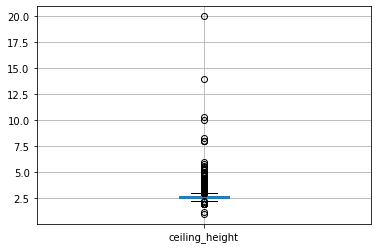

In [48]:
df.loc[:,['ceiling_height']].boxplot() 

Минимальное значение - 1.0, максимальное - 20.0, это выглядит сомнительно.
Посмотрим, сколько потолков выше 2.5 метров и ниже 4.5 метра и встречается и отбросим такие значение, если их немного.

In [49]:
print('Потолки начиная от 2.4 до 4.5 метров:',len(df.loc[:,['ceiling_height']].loc[(df['ceiling_height']<= 2.4)|(df['ceiling_height']>=4.5)]))
print('Потолки начиная от 2.5 до 4.5 метров:',len(df.loc[:,['ceiling_height']].loc[(df['ceiling_height'] <= 2.5)|(df['ceiling_height']>=4.5)]))


Потолки начиная от 2.4 до 4.5 метров: 73
Потолки начиная от 2.5 до 4.5 метров: 3624


Как видим, потолков, которые были бы ниже 2.5 метров очень немного, эти значения выбиваются, можем их отбросить.

In [50]:
df = round(df[(df['ceiling_height'] > 2.4) & (df['ceiling_height'] <= 4.5)], 2)


<AxesSubplot:>

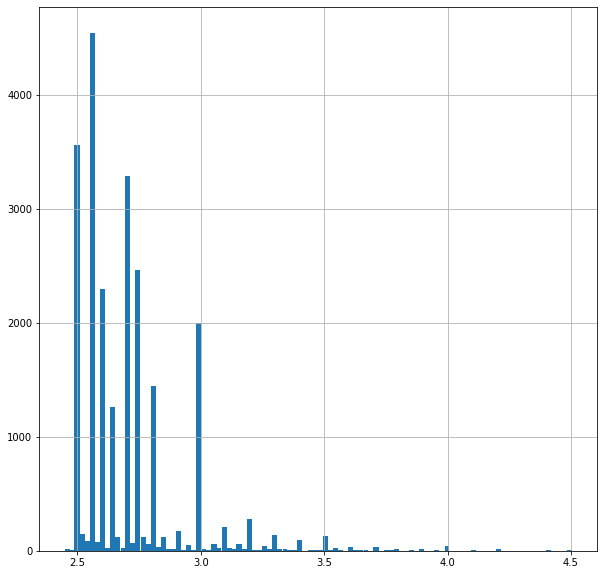

In [51]:
df['ceiling_height'].hist(bins=100, figsize=(10,10))

In [52]:
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Потеряли 0.73 % данных


##### Столбец *rooms_count*

In [53]:
df['rooms_count'].describe()

count   23,526.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms_count, dtype: float64

<AxesSubplot:>

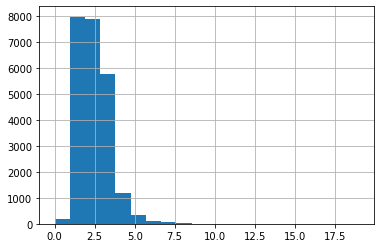

In [54]:
df['rooms_count'].hist(bins=20)

Кол-во комнат больше 8 большая редкость, удалим все значения превышающие 8 комнат. А также заменим значение с троках, гле кол-во комнат равно 0 на 1. Тк большинство этих строк принадлежат либо к апартаментам либо к квартирам открытого плана.

In [55]:
df = df[df['rooms_count'] < 8]

df.loc[df['rooms_count'] == 0, 'rooms_count'] = 1

<AxesSubplot:>

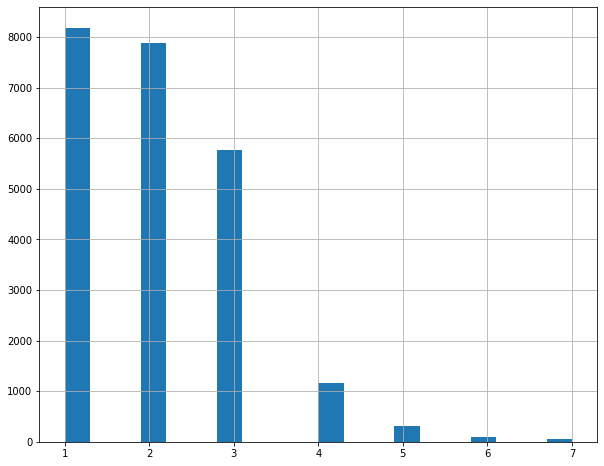

In [56]:
df['rooms_count'].hist(bins=20,figsize=(10,8))

In [57]:
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Потеряли 0.86 % данных


##### Столбец *total_area*

In [58]:
df['total_area'].describe()

count   23,495.00
mean        59.95
std         33.89
min         12.00
25%         40.00
50%         52.00
75%         69.51
max        631.20
Name: total_area, dtype: float64

<AxesSubplot:>

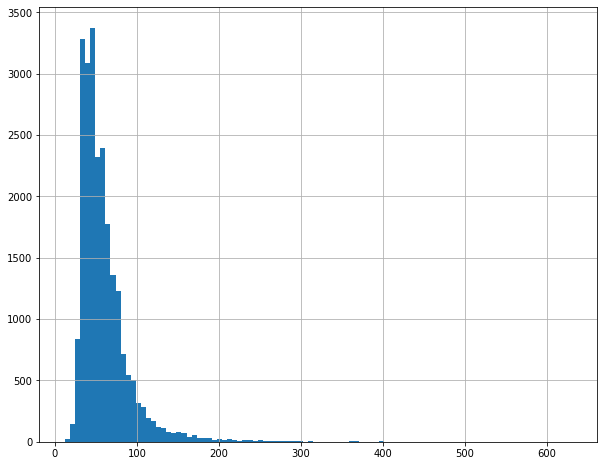

In [59]:
df['total_area'].hist(bins=100,figsize=(10,8))

Площадь более 300 метров редкость. Отечем все площади более 350 метров.

In [60]:
df = df[df['total_area'] <= 350]

<AxesSubplot:>

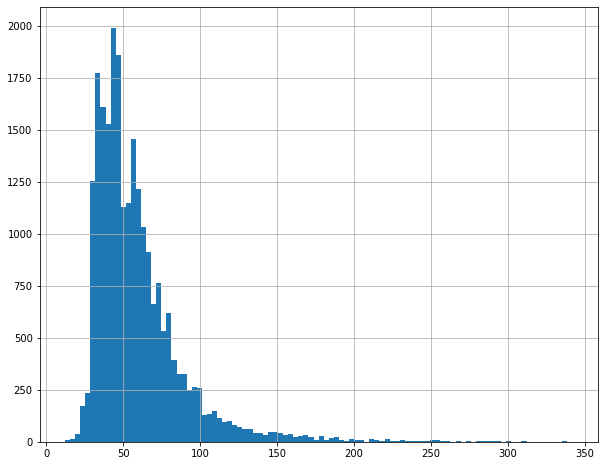

In [61]:
df['total_area'].hist(bins=100 ,figsize=(10,8))

In [62]:
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Потеряли 1.0 % данных


##### Столбик *living_area*

In [63]:
df['living_area'].describe()

count   21,617.00
mean        34.00
std         19.83
min          2.00
25%         18.60
50%         30.00
75%         42.20
max        255.70
Name: living_area, dtype: float64

В этом столбце много значений NaN, оставим все как есть.

<AxesSubplot:>

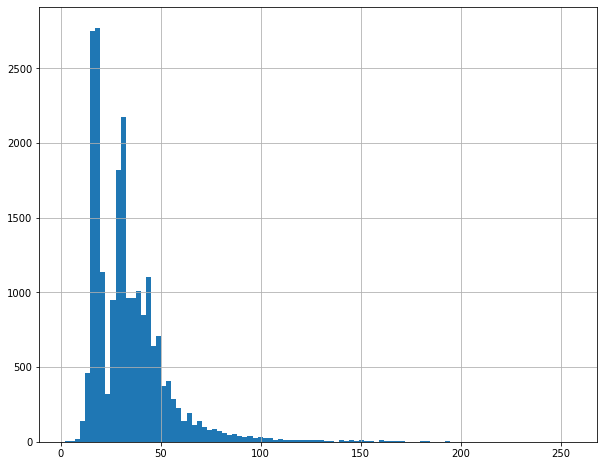

In [64]:
df['living_area'].hist(bins=100,figsize=(10,8))

In [65]:
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Потеряли 1.0 % данных


##### Столбец *kitchen_area*

In [66]:
df['kitchen_area'].describe()

count   21,262.00
mean        10.51
std          5.69
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        107.00
Name: kitchen_area, dtype: float64

<AxesSubplot:>

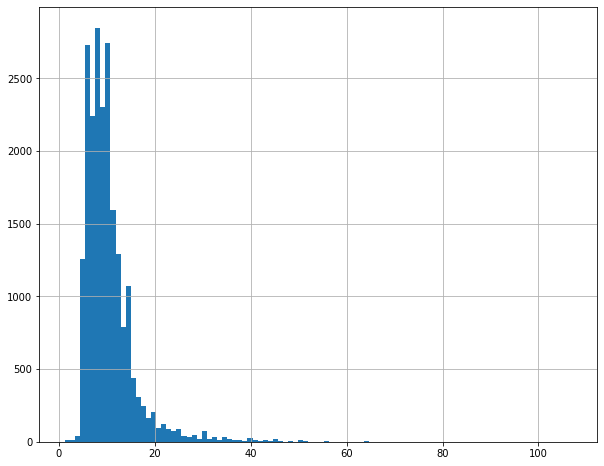

In [67]:
df['kitchen_area'].hist(bins=100, figsize=(10,8))

In [68]:
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Потеряли 1.0 % данных


##### Столбец *balcony_count*

In [69]:
df['balcony_count'].describe()

count   23,463.00
mean         0.59
std          0.96
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          5.00
Name: balcony_count, dtype: float64

<AxesSubplot:>

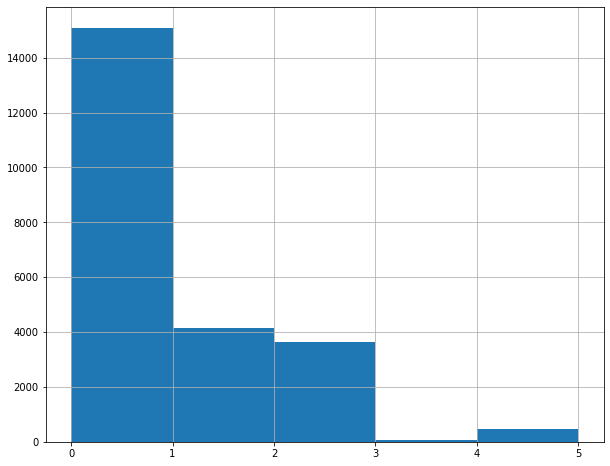

In [70]:
df['balcony_count'].hist(bins=5, figsize=(10,8))

В этих данных выбросов не так уж и много, поэтому в этом столбике удалять ничего не будем.

##### Столбец *floor_number*

In [71]:
df['floor_number'].describe()

count   23,463.00
mean         5.89
std          4.88
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor_number, dtype: float64

<AxesSubplot:>

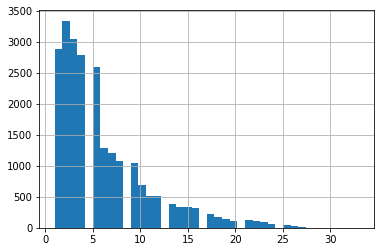

In [72]:
df['floor_number'].hist(bins=40)

Как видно, в этой колонке тоже выбросов не много. Оставим тут все данные.

In [73]:
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Потеряли 1.0 % данных


##### Столбец *floors_count*

In [74]:
df['floors_count'].describe()

count   23,463.00
mean        10.71
std          6.61
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_count, dtype: float64

<AxesSubplot:>

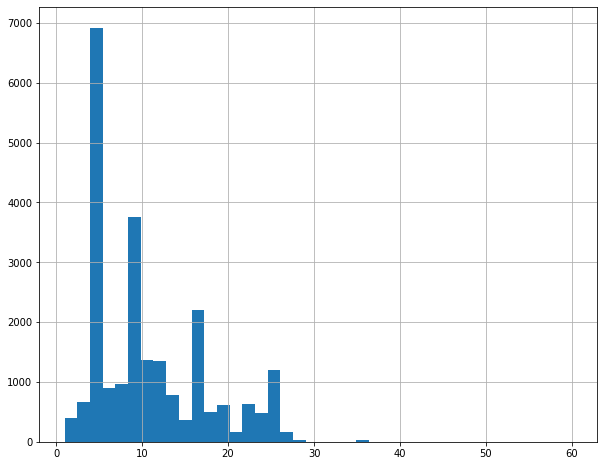

In [75]:
df['floors_count'].hist(bins=40, figsize=(10,8))

Удалим все здания с этажностью более 35

In [76]:
df = df[df['floors_count'] <= 35]

<AxesSubplot:>

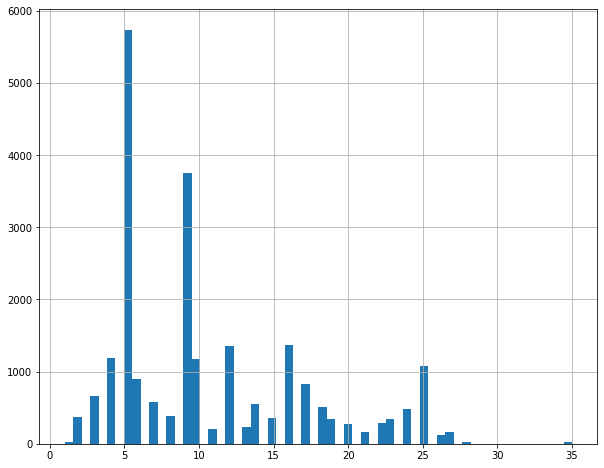

In [77]:
df['floors_count'].hist(bins=60, figsize=(10,8))

In [78]:
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Потеряли 1.02 % данных


##### Столбец *last_price*

In [79]:
df['last_price'].describe()

count        23,457.00
mean      6,303,382.64
std       7,789,293.83
min          12,190.00
25%       3,400,000.00
50%       4,600,000.00
75%       6,750,000.00
max     330,000,000.00
Name: last_price, dtype: float64

<AxesSubplot:>

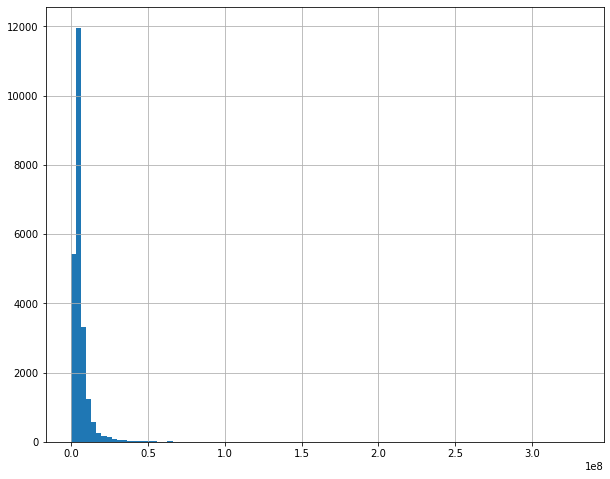

In [80]:
df['last_price'].hist(bins=100,figsize=(10,8))

In [81]:
df = df[df['last_price'] < 50000000]

<AxesSubplot:>

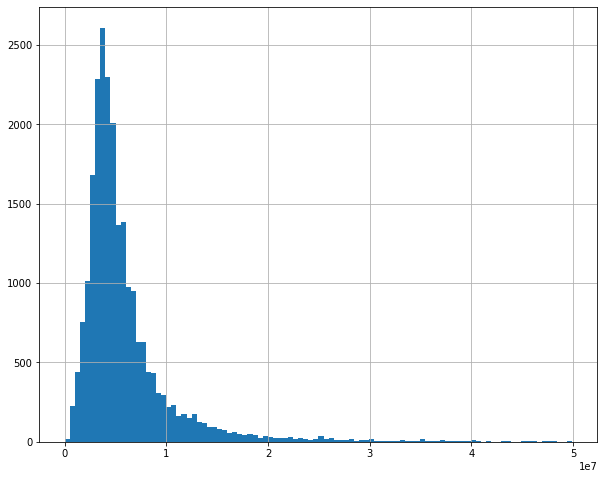

In [82]:
df['last_price'].hist(bins=100,figsize=(10,8))

In [83]:
print('Потеряли',round((origin_size - df.shape[0])/(23699/100), 2),'% данных')

Потеряли 1.47 % данных


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23351 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   images_count          23351 non-null  int64         
 1   last_price            23351 non-null  int64         
 2   total_area            23351 non-null  float32       
 3   first_day_exposition  23351 non-null  datetime64[ns]
 4   rooms_count           23351 non-null  int64         
 5   ceiling_height        23351 non-null  float16       
 6   floors_count          23351 non-null  int64         
 7   living_area           21515 non-null  float64       
 8   floor_number          23351 non-null  int64         
 9   is_apartment          23351 non-null  bool          
 10  studio                23351 non-null  bool          
 11  open_plan             23351 non-null  bool          
 12  kitchen_area          21162 non-null  float64       
 13  balcony_count   

In [85]:
df_na = pd.DataFrame()
df_na['na_percent'] = df.isnull().sum()/len(df) * 100
df_na['na_count'] =  df.isnull().sum()
df_na['df_lenght']  = len(df)
df_na = df_na[df_na['na_count'] > 0] # убедимся что вывод будет содержать только строки столбцы с пропусками.
display(df_na.sort_values(by='na_percent',ascending=False).head(20))

,na_percent,na_count,df_lenght
parks_nearest,66.28,15477,23351
ponds_nearest,61.89,14453,23351
airports_nearest,23.53,5494,23351
city_centers_nearest,23.44,5473,23351
parks_around3000,23.43,5472,23351
ponds_around3000,23.43,5472,23351
days_exposition,13.36,3120,23351
kitchen_area,9.37,2189,23351
living_area,7.86,1836,23351


#### Вывод

На данном этапе была проведена предобработка данных:

* пустые данные столбца is_apartment были заменены на 0, предполагая, что поле было оставлено пустым людьми, не владеющими апартаментами, а соответсвенно и не знающими что это такое
* пустые данные столбца balcony_count заменены на 0, предполагая, что поле было оставлено пустым людьми, в чьих квартирах нет ни одного балкона
* данные с пропусками в столбцах floors_count и locality_name были удалены, так как их количество достаточно мало, чтобы повлиять на финальный результат
* в locality_name были удалены неявные дубликаты
* данные с пропусками в ceiling_height были заменены на медианные значения по данным со схожим количеством этажей и с данными по всему датасету
* остальные данные были оставлены без заполнения пропусков, так как в них нельзя найти прямую зависимость от других, а выдумывание способа их заполнения может сильно навредить сути данных
* были заменены типы данных на целочисленный тип там, где это было возможно, и формат данных был приведён к стандартному типу datetime
* также данные были очищены от выбросов и аномальных значений там, где это было возможно
* итоговая "потеря" данных составила всего 1.47% от изначального количества, что несущественно для последующего исследования, но обезопасит от влияния выбивающихся значений на результат

### 3. Расчеты и добавление результатов в таблицу <a class="anchor" id="chapter3"></a>

Добавим в таблицу несколько столбцов со следующими данными:

- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

##### Цена одного квадратного метра

In [86]:
df['price_m2'] = (df['last_price']/df['total_area'])/1000
df['price_m2'].describe()

count   23,351.00
mean        97.51
std         39.20
min          0.11
25%         76.47
50%         94.80
75%        113.74
max        848.48
Name: price_m2, dtype: float64

##### День публикации объявления

In [87]:
df['weekday'] = df['first_day_exposition'].dt.weekday
sorted(df['weekday'].unique())

[0, 1, 2, 3, 4, 5, 6]

##### Месяц публикации объявления

In [88]:
df['month'] = df['first_day_exposition'].dt.month
sorted(df['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

##### Год публикации объявления

In [89]:
df['year'] = df['first_day_exposition'].dt.year
sorted(df['year'].unique())

[2014, 2015, 2016, 2017, 2018, 2019]

##### Тип этажа квартиры

In [90]:
def floor_func(row):
    if row['floor_number'] == 1:
        return 'первый'
    elif row['floor_number'] == row['floors_count']:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(floor_func, axis=1)

In [91]:
df[['floor_type', 'floor_number', 'floors_count']].sample(10)

,floor_type,floor_number,floors_count
14284,последний,8,8
18546,другой,2,16
9278,другой,9,24
8864,другой,2,5
18989,другой,2,6
12700,другой,3,9
3850,другой,4,5
19764,другой,13,17
15907,другой,2,5
22125,другой,8,9


##### Расстояние в км до центра города

In [92]:
df['distance_city_center_km'] = round(df['city_centers_nearest']/1000, 0)
df[['distance_city_center_km', 'city_centers_nearest']].sample(10)

,distance_city_center_km,city_centers_nearest
12754,22.00,"21,772.00"
4833,17.00,"17,394.00"
7460,19.00,"19,216.00"
13117,13.00,"13,142.00"
14216,NaN,NaN
9844,NaN,NaN
9336,17.00,"16,840.00"
12341,17.00,"16,983.00"
4544,7.00,"6,673.00"
6652,14.00,"13,974.00"


#### Вывод
На этом этапе мы добавили в таблицу столбцы с необходимыми в будущем данными:

* цена за квадратный метр
* день недели, месяц и год публикации объявления
* этаж квартиры: первый, последний, другой
* расстояние до центра в км

### 4. Исследовательский анализ данных <a class="anchor" id="chapter4"></a>

##### Общая площадь;

count   23,351.00
mean        58.77
std         28.88
min         12.00
25%         40.00
50%         52.00
75%         69.00
max        338.60
Name: total_area, dtype: float64

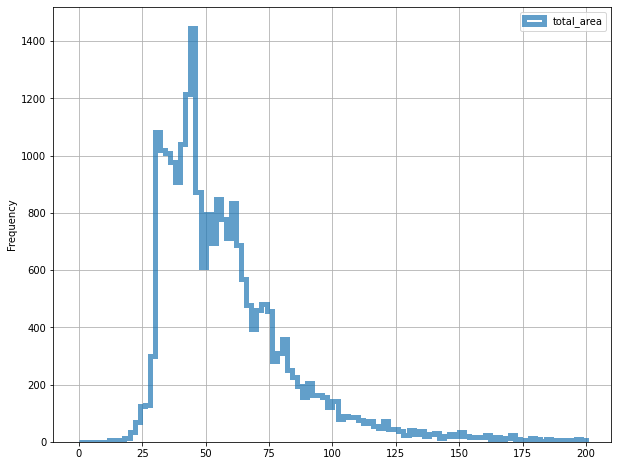

In [93]:
df.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    figsize=(10,8),
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True)
df['total_area'].describe()

Распределение данных нормальное.Выбросы есть, но не критичны. Большинство квартир на рынке недвижимости имеют площадь в пределах от 30 до 80 кв.м.

##### Жилая площадь;

count   21,515.00
mean        33.63
std         18.78
min          2.00
25%         18.60
50%         30.00
75%         42.00
max        230.00
Name: living_area, dtype: float64

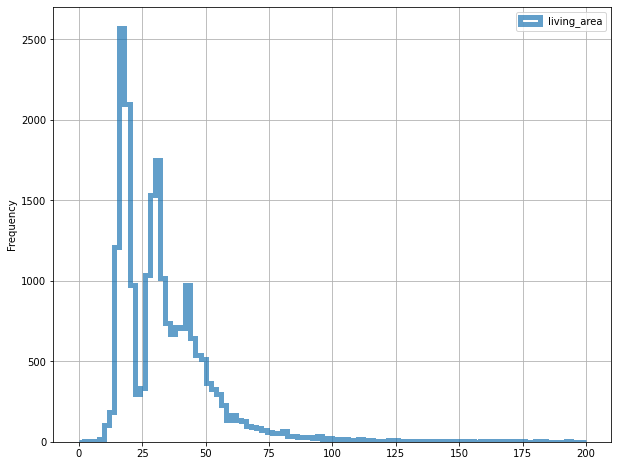

In [94]:
df.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    figsize=(10,8),
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True)
df['living_area'].describe()

Жилая площадь распределение нормальное. Квартиры с жилой площадью от 18.7 до 42, со средним значением 33.63 .Преобладают в объявлениях. \
Нарисуем 2 гистограммы вместе, посмотрим, что из этого выйдет.

<AxesSubplot:ylabel='Frequency'>

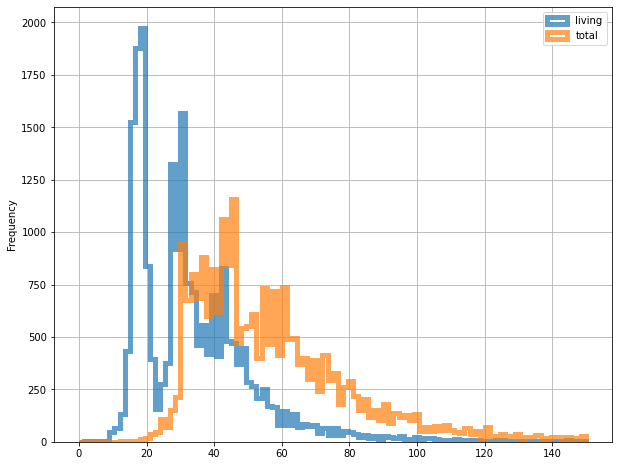

In [95]:
ax = df.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(0, 150),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='living',
)
df.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 150),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='total',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(10,8)
) 

Кривая диаграммы жилой площади повторяет по форме диаграмму общей площади, но смещена влево (что логично, поскольку жилая площадь меньше общей площади)

##### Площадь кухни;

count   21,162.00
mean        10.41
std          5.36
min          1.30
25%          7.00
50%          9.00
75%         12.00
max        100.70
Name: kitchen_area, dtype: float64

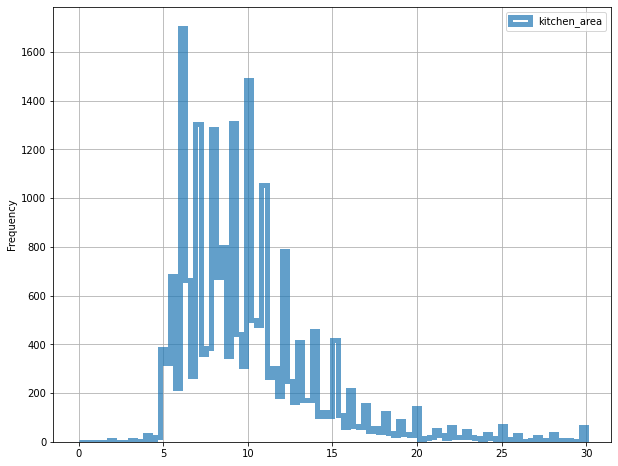

In [96]:
df.plot(
    kind='hist',
    y='kitchen_area',
    histtype='step',
    figsize=(10,8),
    range=(0, 30),
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True)
df['kitchen_area'].describe()

Кухонное пространство. Данные следуют нормальному распределению. Большинство квартир имеют кухни размером от 7 до 12 квадратных метров. В редких случаях кухни очень маленькие, возможно совмещены с другими комнатами. Скорее всего больщинство квартир небольшие.

<AxesSubplot:xlabel='last_price'>

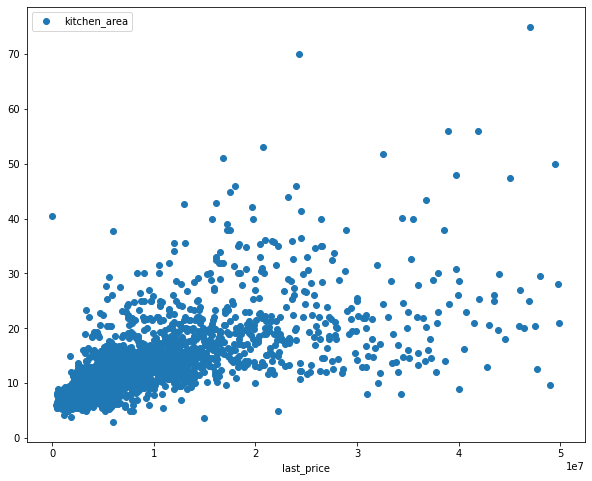

In [97]:
df.pivot_table(index='last_price', values='kitchen_area', aggfunc='mean').plot(style='o', figsize=(10,8))

Мы видим, что чем больше цена, тем кухня больше.

##### Цена объекта;


count       23,351.00
mean     5,946,679.10
std      4,814,450.58
min         12,190.00
25%      3,400,000.00
50%      4,600,000.00
75%      6,700,000.00
max     49,900,000.00
Name: last_price, dtype: float64
Медианная цена квартиры: 4600000.0


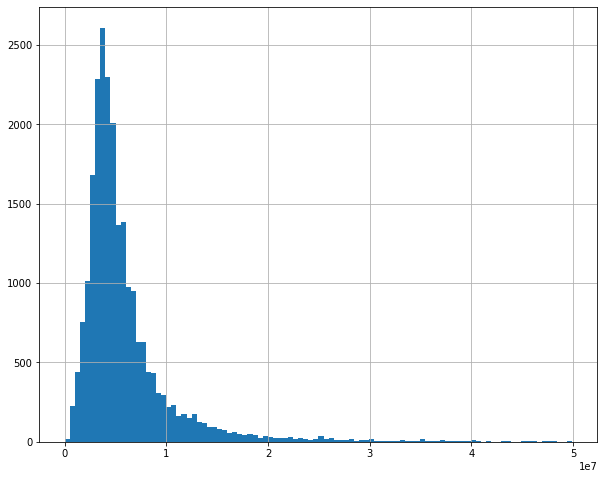

In [98]:
df['last_price'].hist(bins= 100, figsize=(10,8))
print(df['last_price'].describe())
print('Медианная цена квартиры:',df['last_price'].median())

Тут нет ничего необычного - количество квартир с ценой до примерно 3,5-3,9 млн. рублей стабильно увеличивается, достигая максимума. За этим значением число квартир с ценой превышающей пиковую, одинаково уменьшается.

##### Количество комнат;


count   23,351.00
mean         2.05
std          1.00
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms_count, dtype: float64

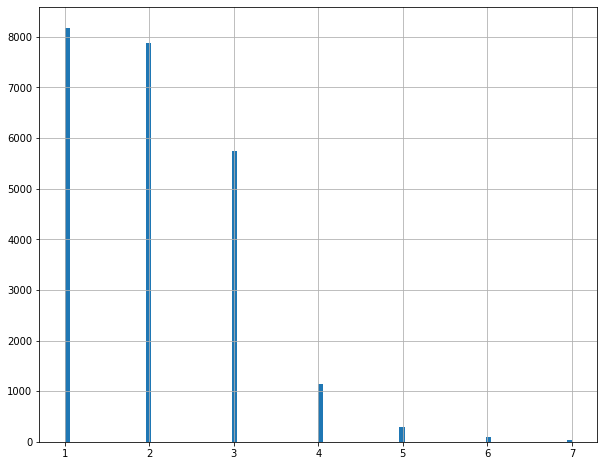

In [99]:
df['rooms_count'].hist(bins= 100, figsize=(10,8))
df['rooms_count'].describe()

<AxesSubplot:ylabel='rooms_count'>

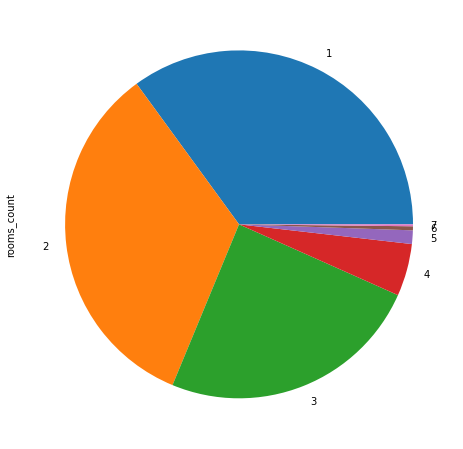

In [100]:
df.groupby('rooms_count')['rooms_count'].count().plot(kind='pie',figsize=(10,8))

Это подтверждает нашу гипотезу, что большая часть объявлений относится к одно- и двухкомнатным квартирам (примерно по 8000 объявлений каждая категория). Трехкомнатных квартир меньше - около 6000 объявлений. Четырехкомнатные квартиры тоже встречаются достаточно - слегка свыше 1000 объявлений. Квартиры с большим количеством комнат встречаются уже очень редко.

##### Высота потолков;


count   23,351.00
mean         2.71
std          0.22
min          2.45
25%          2.55
50%          2.65
75%          2.75
max          4.50
Name: ceiling_height, dtype: float64

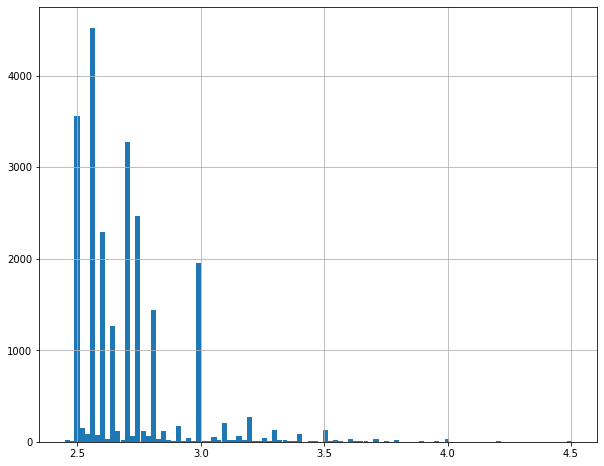

In [101]:
df['ceiling_height'].hist(bins= 100, figsize=(10,8))
df['ceiling_height'].describe()

Также всё ясно с высотой потолков - в большинстве случаев она варьируется от 2,4 до 2,75 метров. Ранее при обработке пропущенных значений мы договорились заменить пропуски медианой, что дополнительно увеличило число квартир с такой высотой потолков.

##### Этаж квартиры;


count   23,351.00
mean         5.89
std          4.88
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor_number, dtype: float64

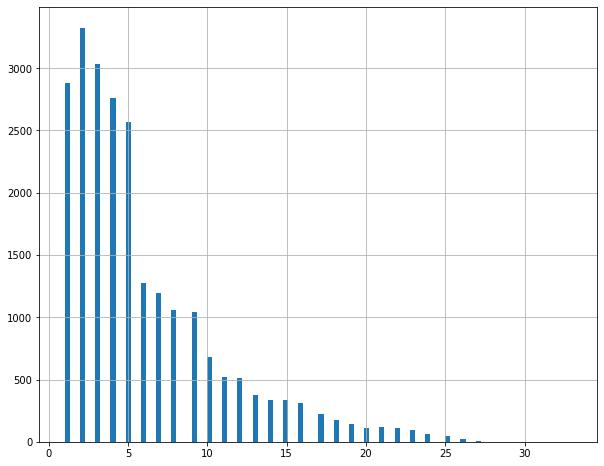

In [102]:
df['floor_number'].hist(bins= 100, figsize=(10,8))
df['floor_number'].describe()

В основном, на продажу выставляются квартиры, которые не находятся на крайних этажах. Самые непопулярные для продажи оказываются квартиры на первых этажах.

##### Тип этажа квартиры («первый», «последний», «другой»);


In [103]:
floor_type = df.groupby('floor_type')['floor_number'].count()
floor_type

floor_type
другой       17197
первый        2885
последний     3269
Name: floor_number, dtype: int64

<AxesSubplot:>

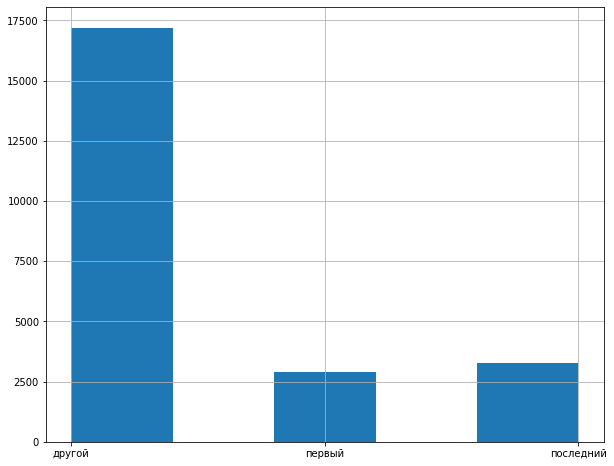

In [137]:
df['floor_type'].hist(bins= 5, figsize=(10,8))

##### Общее количество этажей в доме;


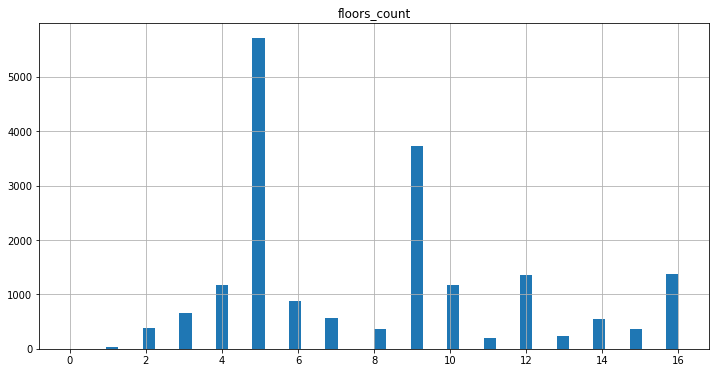

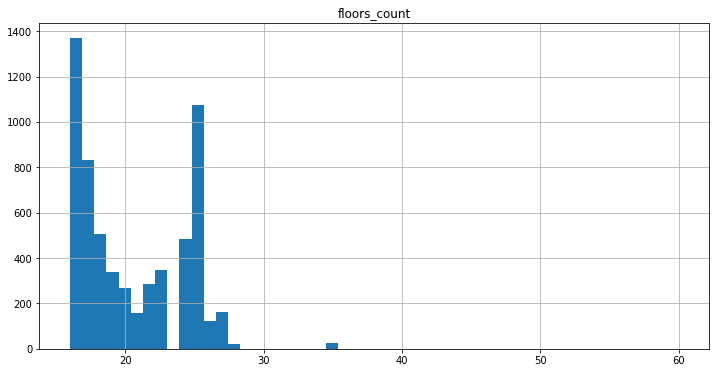

In [105]:
df['floors_count'].describe()
df.hist('floors_count',bins=50, range=(0,16), figsize=(12,6))
plt.show()
df.hist('floors_count',bins=50, range=(16,60), figsize=(12,6))
plt.show()

##### Расстояние до центра города в метрах;


count   17,878.00
mean    14,274.54
std      8,593.97
min        181.00
25%      9,417.25
50%     13,149.00
75%     16,332.75
max     65,968.00
Name: city_centers_nearest, dtype: float64

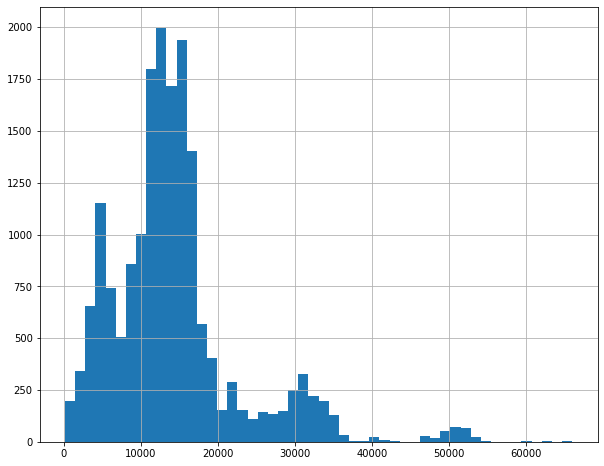

In [106]:
df['city_centers_nearest'].hist(bins=50, figsize=(10,8))
df['city_centers_nearest'].describe()

Большинство квартир находятся от центра города на расстоянии не более 13000 метров. 
На графике можно наблюдать 4 пика первый пик может быть отнесен квартирам находящимся в центре города, или же объявления могли подавать из малых городов,
где дома находятся ближе к центру.
Самые дальная от центра города недвижимость находится на расстоянии более 60000 метров.

##### Расстояние до ближайшего аэропорта;


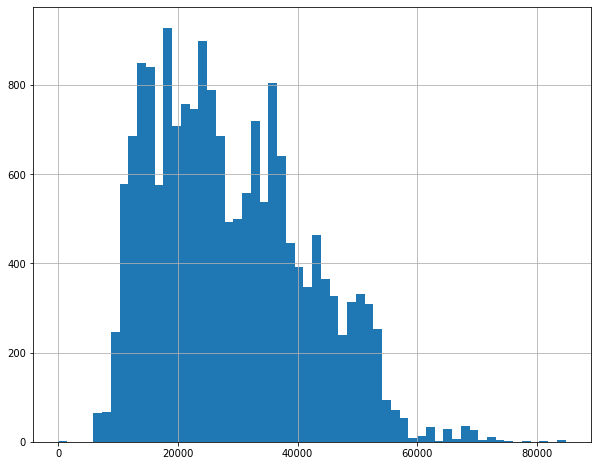

In [107]:
df['airports_nearest'].hist(bins=58, figsize=(10,8))
plt.show()

Аналогичная картина и с расстоянием до ближайшего аэропорта.

##### Расстояние до ближайшего парка;


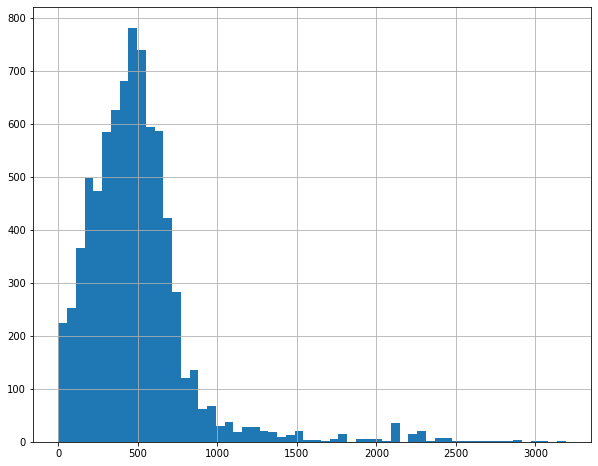

count   7,874.00
mean      491.97
std       341.90
min         1.00
25%       288.00
50%       456.00
75%       613.00
max     3,190.00
Name: parks_nearest, dtype: float64

In [108]:
df['parks_nearest'].hist(bins=58, figsize=(10,8))
plt.show()
df['parks_nearest'].describe()

Как видно по графику, ближайшие парки, в основном, расположены в пределах 600 метров от дома. Пиковое значение (460 метров) является медианным. 

##### День и месяц публикации объявления

count   23,351.00
mean         2.57
std          1.79
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: weekday, dtype: float64

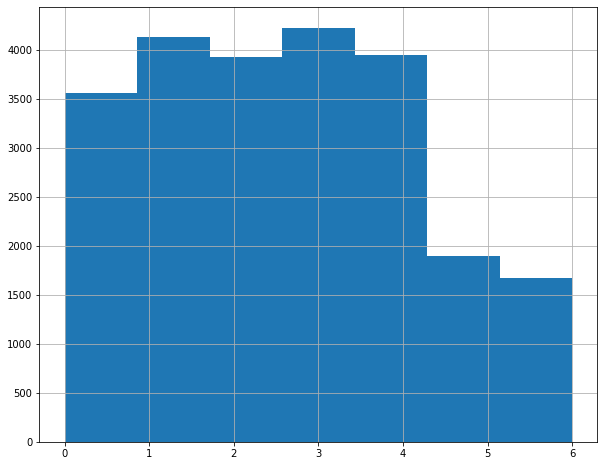

In [109]:
df['weekday'].hist(bins=7, figsize=(10,8))
df['weekday'].describe()

count   23,351.00
mean         6.40
std          3.49
min          1.00
25%          3.00
50%          6.00
75%         10.00
max         12.00
Name: month, dtype: float64

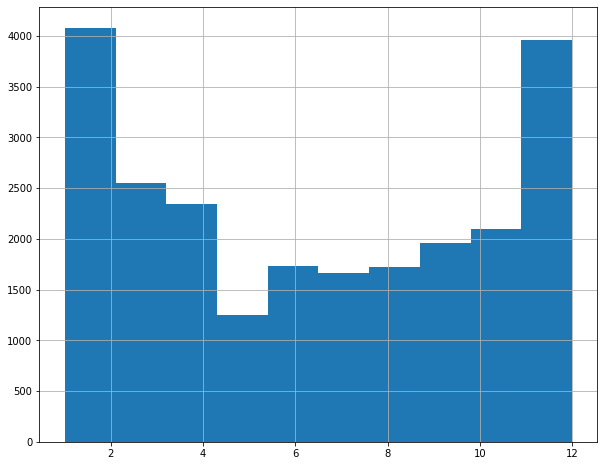

In [110]:
df['month'].hist(bins=10, figsize=(10,8))
df['month'].describe()

Относительно дня публикации объявления, в рабочие дни они размещались примерно с одинаковой частотой (немного чаще в четверг). В выходные дни объявления появлялись в два раза реже, чем в будни.

Распределение по месяцам также представляет определенный интерес. В январе, мае и декабре объявления размещались не так часто, как в остальные месяцы (вероятно, это связано с праздничными днями). Пик публикаций приходится на февраль. Летом объявления размещаются в среднем с одинаковой частотой, а в сентябре начинается рост, достигающий своего максимума в ноябре.

##### 4.1 Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление." <a class="anchor" id="section_4_1"></a>

count   20,231.00
mean       180.06
std        218.99
min          1.00
25%         45.00
50%         95.00
75%        230.00
max      1,580.00
Name: days_exposition, dtype: float64

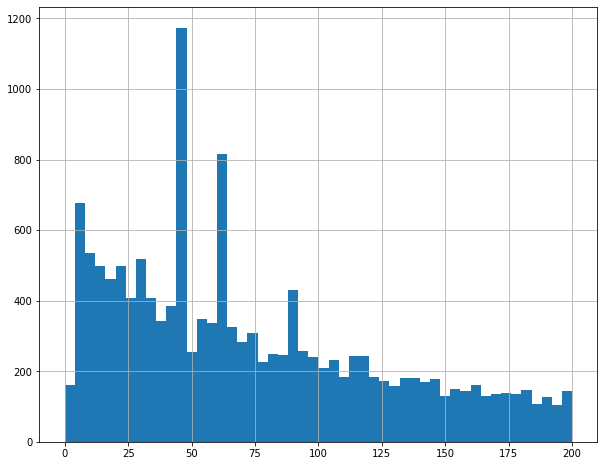

In [123]:
df['days_exposition'].hist(bins=50, figsize=(10,8), range = (0,200))
df['days_exposition'].describe()

На гистограмме есть несколько пиков, которые явно выбиваются из общего тренда. Неплохо было бы посмотреть, какие сроки продажи являются фаворитами по количеству повторений.

In [150]:
df['days_exposition'].value_counts().head(10)

45.00    871
60.00    538
7.00     232
30.00    207
90.00    196
4.00     175
3.00     157
5.00     149
14.00    143
9.00     141
Name: days_exposition, dtype: int64

In [151]:
df = df.query('days_exposition not in [7,14,30,45,60,90]')

<AxesSubplot:>

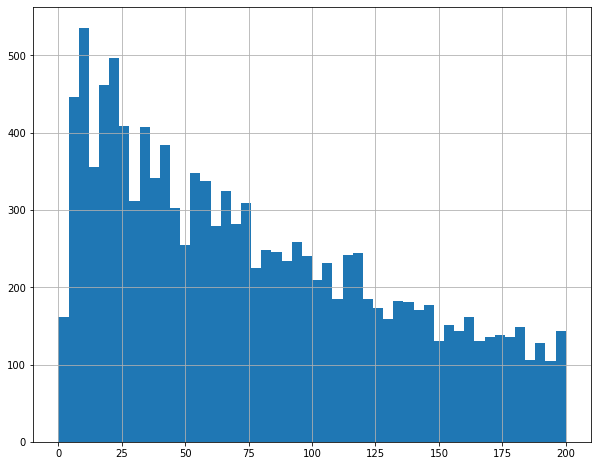

In [155]:
df['days_exposition'].hist(bins=50, figsize=(10,8), range = (0,200))

Для определения быстрых и необычайно долгих продаж лучше всего ориентироваться на медианное значение - 95 дней (т.е. примерно 3 месяца).

Быстрыми продажами можно считать те, которые были совершены в 2 раза быстрее, чем медиана (т.е., быстрее 47 дней).

Аномально долгими можно считать продажи, которые заняли свыше 500 дней (более 5 медианных значений).

##### 4.2 Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы." <a class="anchor" id="section_4_2"></a>

Посмотрим на линейную корреляцию цены от следующих параметров:

- total_area;
- living_area;
- kitchen_area;
- rooms_count;
- floor_number;
- weekday;
- month;
- year.

In [138]:
df.corr()

,images_count,last_price,total_area,rooms_count,ceiling_height,floors_count,living_area,floor_number,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,distance_city_center_km
images_count,1.00,0.15,0.12,0.10,0.05,0.01,0.11,0.03,0.01,-0.03,...,0.02,-0.00,-0.02,0.00,-0.03,0.14,-0.01,0.01,0.14,-0.04
last_price,0.15,1.00,0.78,0.50,0.43,0.04,0.68,0.06,0.04,-0.05,...,0.20,0.01,0.21,-0.11,0.13,0.70,-0.02,0.01,-0.05,-0.33
total_area,0.12,0.78,1.00,0.79,0.39,-0.06,0.93,-0.03,0.02,-0.09,...,0.15,-0.01,0.16,-0.08,0.16,0.19,-0.01,0.01,-0.08,-0.23
rooms_count,0.10,0.50,0.79,1.00,0.21,-0.22,0.87,-0.15,-0.00,-0.08,...,0.12,-0.05,0.08,-0.04,0.12,-0.03,-0.01,0.00,-0.05,-0.17
ceiling_height,0.05,0.43,0.39,0.21,1.00,-0.03,0.36,-0.01,0.06,0.01,...,0.22,-0.06,0.21,-0.12,0.11,0.31,-0.02,0.00,-0.05,-0.30
floors_count,0.01,0.04,-0.06,-0.22,-0.03,1.00,-0.17,0.68,-0.03,0.07,...,-0.25,0.10,-0.12,0.03,-0.05,0.22,0.01,0.02,0.00,0.01
living_area,0.11,0.68,0.93,0.87,0.36,-0.17,1.00,-0.11,0.02,-0.06,...,0.16,-0.04,0.14,-0.06,0.14,0.10,-0.01,0.00,-0.07,-0.22
floor_number,0.03,0.06,-0.03,-0.15,-0.01,0.68,-0.11,1.00,-0.01,0.04,...,-0.16,0.07,-0.08,0.02,-0.04,0.17,0.01,0.02,0.00,0.01
is_apartment,0.01,0.04,0.02,-0.00,0.06,-0.03,0.02,-0.01,1.00,-0.00,...,0.01,-0.03,0.02,0.01,0.01,0.04,-0.01,0.00,0.01,0.01
studio,-0.03,-0.05,-0.09,-0.08,0.01,0.07,-0.06,0.04,-0.00,1.00,...,-0.03,0.01,-0.00,0.00,-0.02,0.02,-0.00,-0.00,0.01,-0.01


Были получены следующие коэффициенты корреляции цены:

- total_area - 0.78;
- living_area - 0.68;
- kitchen_area - 0.06;
- rooms_count - 0.50;
- floor_number - 0.06;
- weekday - -0.02;
- month - 0.01;
- year - -0.05.

Как видно из приведенных выше данных, стоимость объекта недвижимости наиболее сильно связана с его общей площадью и в меньшей степени зависит от жилой площади и площади кухни. Однако, поскольку жилая площадь и площадь кухни включены в общую площадь, мы можем сделать вывод, что общая площадь - это основной фактор, влияющий на стоимость объекта недвижимости. Далее это будет визуализировано.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor_number', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='total_area'>,
        <AxesSubplot:xlabel='floor_number', ylabel='total_area'>,
        <AxesSubplot:xlabel='weekday', yl

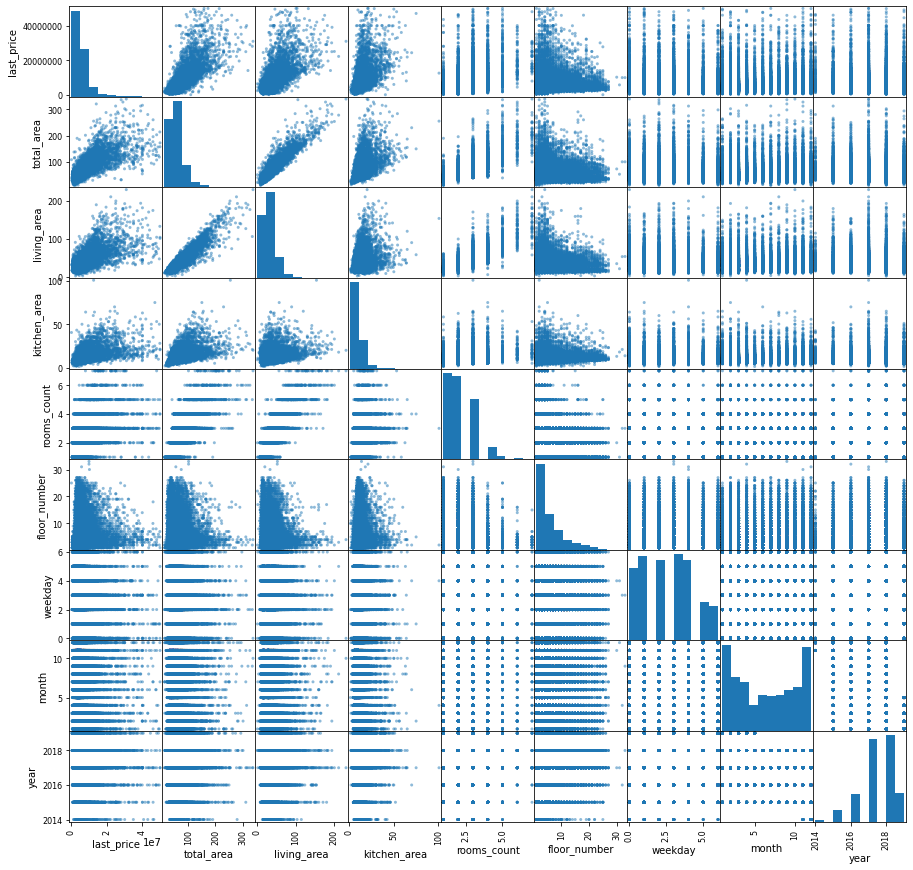

In [139]:
df_matrix = df.loc[:,['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms_count', 'floor_number', 'weekday', 'month', 'year']]
pd.plotting.scatter_matrix(df_matrix, figsize=(15, 15))

##### Зависит ли цена от жилой площади

<AxesSubplot:xlabel='total_area'>

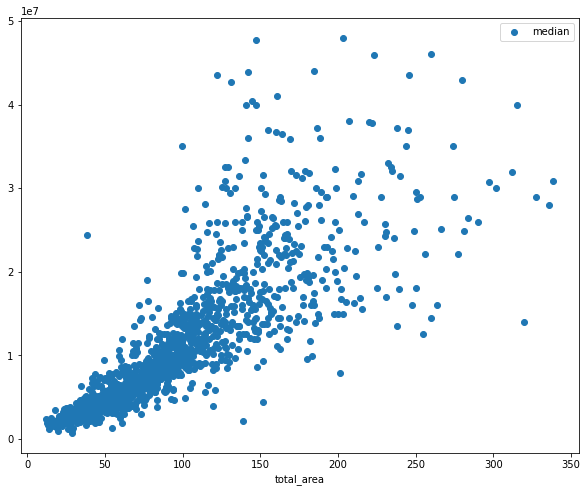

In [156]:
pivot_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [157]:
df['last_price'].corr(df['total_area'])

0.7812199145668648

##### Зависит ли цена от жилой площади

<AxesSubplot:xlabel='living_area'>

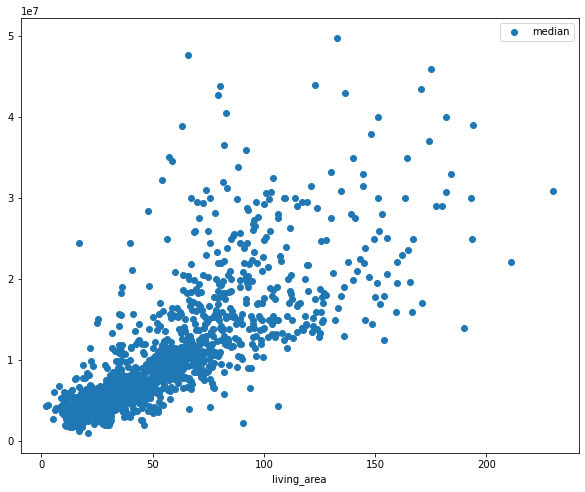

In [158]:
pivot_total_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [159]:
df['last_price'].corr(df['living_area'])

0.680063797658493

<AxesSubplot:xlabel='kitchen_area'>

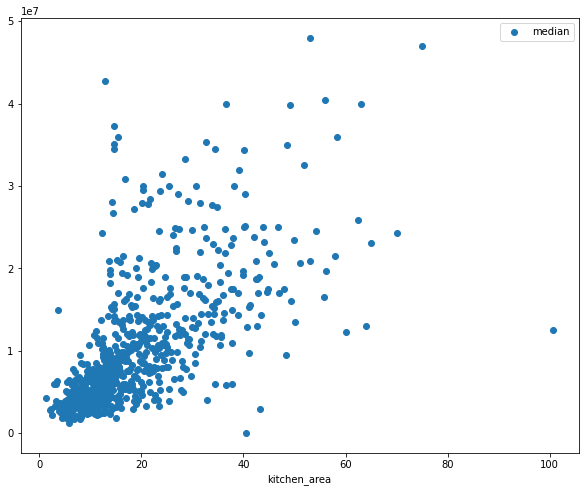

In [160]:
pivot_total_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [161]:
df['last_price'].corr(df['kitchen_area'])

0.5993736115281074

##### Зависимость полной цены от количества комнат.

(0.0, 70000000.0)

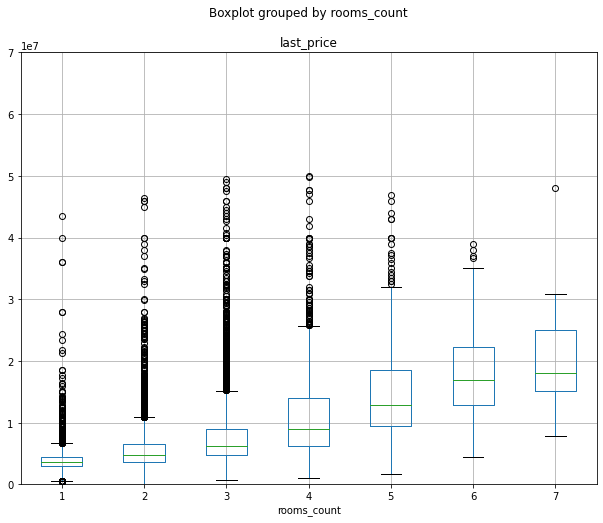

In [167]:
df.boxplot('last_price', by='rooms_count',figsize=(10,8)).set_ylim(0,70000000)

In [169]:
df['rooms_count'].corr(df['last_price'])

0.4966585420013271

##### Зависимость полной цены от этажа

<AxesSubplot:title={'center':'last_price'}, xlabel='floor_type'>

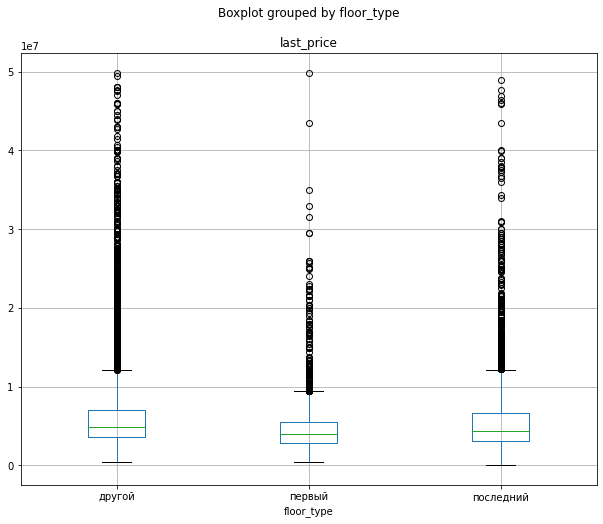

In [171]:
df.boxplot('last_price', by='floor_type',figsize=(10,8))

In [175]:
df['floor_number'].corr(df['last_price'])

0.0563758625397087

##### День продажи

(0.0, 20000000.0)

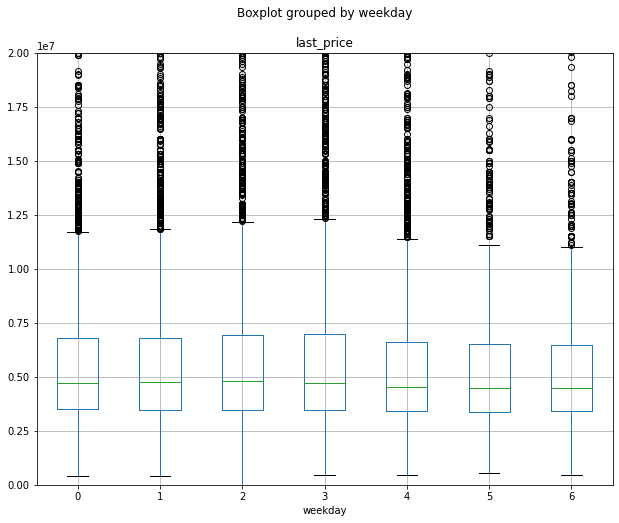

In [180]:
df.boxplot('last_price', by='weekday',figsize=(10,8)).set_ylim(0,20000000)

In [181]:
df['weekday'].corr(df['last_price'])

-0.022855172738805486

##### Месяц вывески объявления

(0.0, 15000000.0)

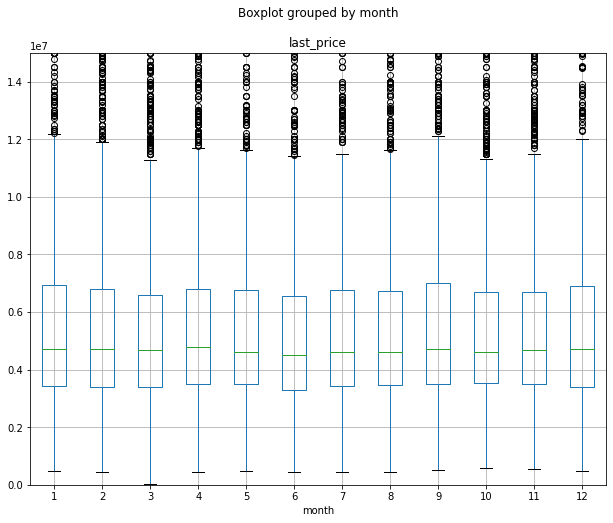

In [182]:
df.boxplot('last_price', by='month',figsize=(10,8)).set_ylim(0,15000000)

In [183]:
df['month'].corr(df['last_price'])

0.001716046617656808

##### Год вывески объявления

(0.0, 30000000.0)

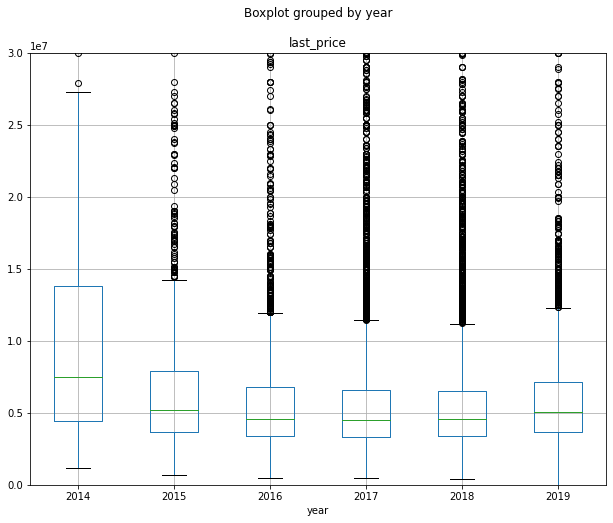

In [184]:
df.boxplot('last_price', by='year',figsize=(10,8)).set_ylim(0,30000000)


Исходя из приведенных выше данных, можно видеть, что первые три фактора (общая площадь, жилая площадь, площадь кухни) существенно влияют на цену. Более того, общая и жилая площадь тесно связаны друг с другом, что вполне логично.

Количество комнат также влияет на цену, хотя его вклад не столь значителен.

Итак, результаты анализа можно интерпретировать следующим образом:

На цену объекта недвижимости значительное влияние оказывает его общая площадь. Другие характеристики объекта недвижимости (жилая площадь, площадь кухни, количество комнат) влияют на цену главным образом через свою корреляцию с общей площадью, и поэтому они также коррелируют с ценой.

В то же время, как из графиков, так и из коэффициента корреляции Пирсона видно, что влияние дня недели или месяца размещения объявления на цену находится в пределах статистической погрешности.

Влияние года размещения объявления на цену слегка превышает уровень погрешности и может отражать влияние долгосрочных факторов (таких как инфляция, фазы экономического цикла, бум или спад на рынке недвижимости) на формирование цен на рынке недвижимости.

##### 4.3 "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`." <a class="anchor" id="section_4_3"></a>

In [140]:
top_10 = df['locality_name'].value_counts().index[0:10]
top_10

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'Выборг'],
      dtype='object')

In [141]:
(df
     .query('locality_name in @top_10')
     .pivot_table(index='locality_name', values='price_m2', aggfunc='mean')
     .sort_values(by='price_m2',ascending=False))

,price_m2
locality_name,
Санкт-Петербург,112.10
Пушкин,103.15
Кудрово,95.26
поселок Парголово,90.18
Мурино,86.04
поселок Шушары,78.55
Колпино,75.35
Гатчина,68.75
Всеволожск,68.72


In [142]:
df.groupby('locality_name').agg({'balcony_count':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony_count', ascending = False) \
    .head(10)

,balcony_count,last_price
locality_name,,
Санкт-Петербург,15473,"5,500,000.00"
Мурино,586,"3,400,000.00"
Кудрово,469,"3,890,000.00"
поселок Шушары,439,"3,950,000.00"
Всеволожск,397,"3,450,000.00"
Пушкин,364,"5,165,000.00"
Колпино,336,"3,600,000.00"
поселок Парголово,327,"4,100,000.00"
Гатчина,307,"3,100,000.00"


Определим самую высокую и самую низкую цену квадратного метра, усредненную по каждому населенному пункту:

In [143]:
min_price = df.groupby('locality_name')['price_m2'].mean().min()
max_price = df.groupby('locality_name')['price_m2'].mean().max()

Посмотрим, в каком населенном пункте самые низкие цены на недвижимость:

In [144]:
df.pivot_table(index='locality_name', values='price_m2', aggfunc='mean').query('price_m2 == @min_price')

,price_m2
locality_name,
деревня Старополье,11.21


Посмотрим, в каком населенном пункте самые высокие цены на недвижимость:

In [145]:
df.pivot_table(index='locality_name', values='price_m2', aggfunc='mean').query('price_m2 == @max_price')

,price_m2
locality_name,
Зеленогорск,115.12


##### 4.4 "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города." <a class="anchor" id="section_4_4"></a>

<AxesSubplot:xlabel='distance_city_center_km', ylabel='price_m2'>

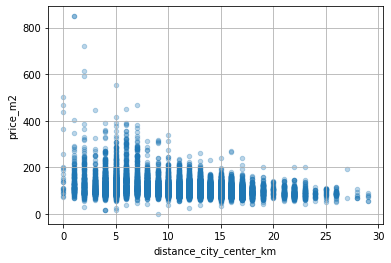

In [146]:
(df[df['locality_name'] == 'Санкт-Петербург']
       .plot(
           x='distance_city_center_km', 
           y='price_m2', 
           kind='scatter', 
           grid=True, 
           alpha=0.3))

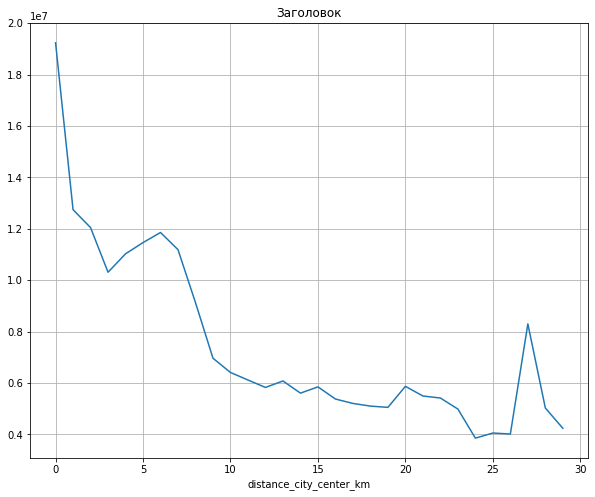

In [148]:
st_petersburg_df.plot(figsize=(10,8), grid = True, title = 'Заголовок');

Как показывает график, наиболее ценная недвижимость расположена в радиусе до 3 км от центра Санкт-Петербурга. Затем, интересно, что стоимость квартир на расстоянии от 6 до 7 км от центра оказывается выше, чем в промежутке от 3 до 5 км. Такая динамика может быть обусловлена различными факторами, включая класс жилья, год постройки дома, инфраструктуру и прочее. После этого, цена постепенно падает вплоть до 26 км от центра. Заметно небольшое увеличение цены на расстоянии 27 км от центра, что, вероятно, также обусловлено особенностями конкретных объектов недвижимости в этой зоне.

В общем, стоимость недвижимости обратно пропорциональна расстоянию до центра города: чем дальше объект расположен от центра, тем ниже его стоимость. Однако могут быть исключения, в зависимости от других факторов, таких как количество комнат, общая площадь и т.д. Район расположения квартиры также может играть роль в ценообразовании, а также возможны другие неучтенные факторы. Например, это заметно на расстоянии 12 км от центра.

### 5. Общий вывод <a class="anchor" id="chapter5"></a>

В начале нашего исследования мы провели подготовительную работу с данными, исправляя пропуски, меняя типы данных, удаляя дубликаты и выявляя аномалии. Подготовка данных привела к удалению всего 0,62% информации из исходного набора данных, что не могло существенно повлиять на точность нашего анализа. Затем мы добавили несколько колонок, необходимых для нашего анализа. На основании выполненного анализа мы пришли к следующим выводам: 
- Общая стоимость квартиры в Петербурге и окресностях, зависит.
    * От общей площади квартиры.
    * От жилой площади квартиры.
    * От площади кухни.
    * От количества комнат.
    * Удаленность от центра тоже вносит свои корректировки в образовании конечной цены.
* Самое большое предложение продаж по городу Санкт-Петербургу, так же и самая высокая цена квадратного метра. Так же в топ 10 по цене квадрата, входят Мурино,Шушары, Выборг замыкает топ.
* Большую часть рынка занимают квартиры с одной или двумя комнатами, площадью от 30 до 50 квадратных метров.
* Средняя цена жилья на рынке варьируется от 3,5 до 4 миллионов рублей.
* Предложения в основном приходятся на пяти- и девятиэтажные здания.
* По большей части квартиры, выставленные на продажу, расположены не на первом и не на последнем этажах.
* Медианный срок продажи квартиры составляет около трех месяцев.
* Важнейшим фактором, влияющим на стоимость недвижимости, является ее общая площадь.
* Самая высокая стоимость жилья наблюдается в Санкт-Петербурге (почти 115 тысяч рублей за квадратный метр), в то время как самое дешевое жилье находится в Выборге (чуть больше 58 тысяч рублей за квадратный метр) - это статистика по десяти городам с наибольшим количеством объявлений.
* В пределах Санкт-Петербурга, наиболее дорогое жилье расположено в радиусе 3 километров от центра города.
* Рекомендации возможно ввести ограничения на ввод данных о высоте потолков: допущено множество ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.).

* Обязательное поле для заполнения количество балконов, названий локации продажи(указать город и т.д), полe количество комнат не может быть 0.

* Большинство продаж кажутся слишком упорядоченными, осуществляясь через промежутки одной недели, месяца, полутора, двух, трех месяцев. По всей видимости, это скорее сроки, когда объявление должно было быть либо удалено, либо продлено. Вероятно, продажи, осуществленные через две недели (14 дней), также вписываются в эту категорию.
* После 2014 года рынок недвижимости стал чувствовать себя менее уверенно, показывая спад. Только в 2019 цены на недвижимость п
